Desarrollar un modelo de regresión que permita predecir el
precio por metro cuadrado de una propiedad. El objetivo final es que el
modelo que desarrollen sea utilizado como tasador automático a ser
aplicados a las próximas propiedades que sean comercializadas por la
empresa.

1) Efectuar una limpieza del dataset provisto. Particularmente, deberá
diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

In [46]:
import pandas as pd
df = pd.read_csv('properatti.csv')
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [27]:
df.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [28]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [29]:
df.shape

(121220, 26)

In [30]:
df.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

In [31]:
type(df)

pandas.core.frame.DataFrame

2) Realizar un análisis descriptivo de las principales variables.

Analizando los missings por columnas

In [32]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

Se observa que floor y expenses tienen la mayor cantidad de valores faltantes.

In [33]:
#Elimino missings
df = df.dropna()

In [34]:
#Verifico que no tengo missings
df.isnull().sum()

Unnamed: 0                    0
operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
state_name                    0
geonames_id                   0
lat-lon                       0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
price_usd_per_m2              0
price_per_m2                  0
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
image_thumbnail               0
dtype: int64

3) Crear nuevas columnas a partir de las características dadas que puedan
tener valor predictivo.

<AxesSubplot: xlabel='country_name', ylabel='count'>

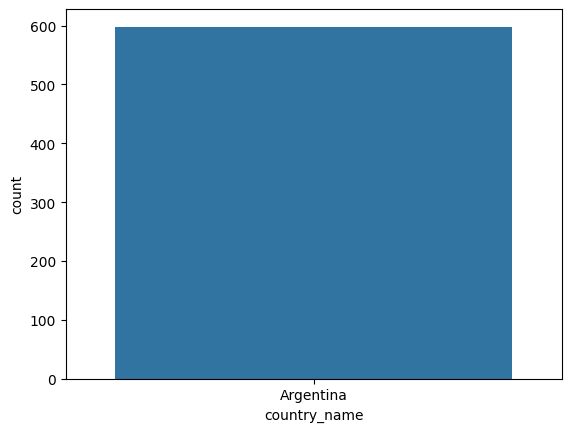

In [35]:
import seaborn as sns 
sns.countplot(x='country_name', data=df)  #Verifico el único país es Argentina

<AxesSubplot: xlabel='operation', ylabel='count'>

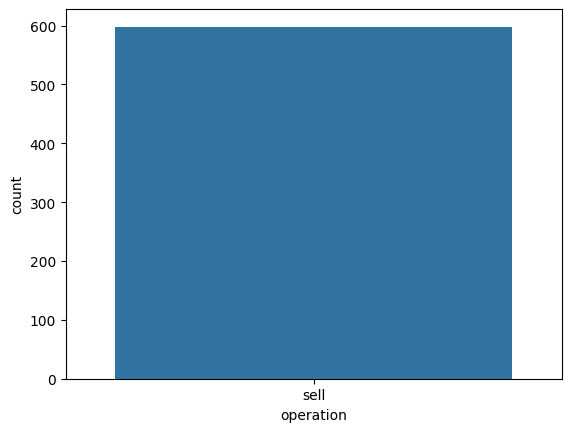

In [36]:
sns.countplot(x='operation', data=df) #Verifico todas la operaciones son ventas

<AxesSubplot: xlabel='property_type', ylabel='count'>

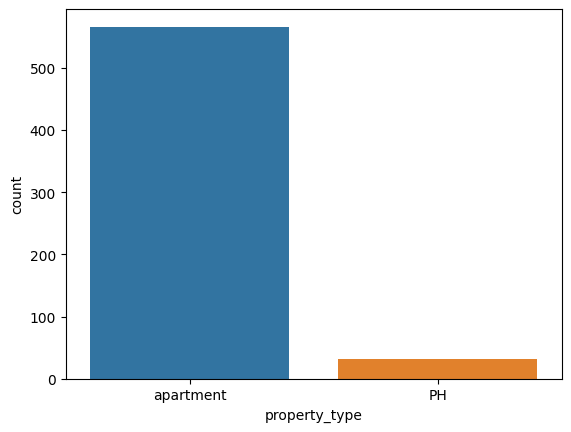

In [37]:
sns.countplot(x='property_type', data=df) 

In [47]:
#Elimino columnas inncesarias
df2 = df.drop(df.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13,18,21,22,23,24,25]], axis='columns')
df2.head

<bound method NDFrame.head of        property_type  price_aprox_usd  surface_total_in_m2  \
0                 PH          62000.0                 55.0   
1          apartment         150000.0                  NaN   
2          apartment          72000.0                 55.0   
3                 PH          95000.0                  NaN   
4          apartment          64000.0                 35.0   
...              ...              ...                  ...   
121215     apartment         870000.0                113.0   
121216         house         498000.0                360.0   
121217     apartment         131500.0                 46.0   
121218     apartment          95900.0                 48.0   
121219     apartment         129000.0                 77.0   

        surface_covered_in_m2  price_usd_per_m2  floor  rooms  
0                        40.0       1127.272727    NaN    NaN  
1                         NaN               NaN    NaN    NaN  
2                        55.0    

C:\Users\n_sar\AppData\Local\Temp\ipykernel_3804\2142440804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


<AxesSubplot: >

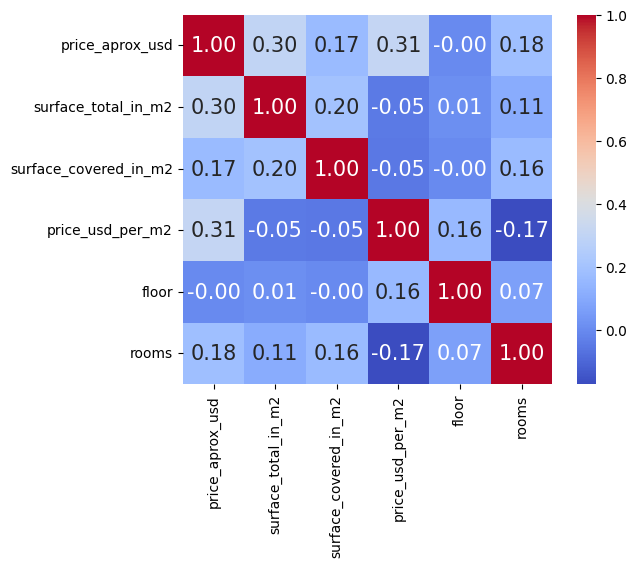

In [48]:
corr = df2.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm')